## 1 Non-negative matrix factorization (20 points)
1.1 Implementation
We learned in the lecture that the NMF can be found by alternating updates of the form
$$
\begin{aligned}
\mathbf{H}_{t+1} & \leftarrow \mathbf{H}_t \frac{\mathbf{Z}_t^T \mathbf{X}}{\mathbf{Z}_t^T \mathbf{Z}_t \mathbf{H}_t} \\
\mathbf{Z}_{t+1} & \leftarrow \mathbf{Z}_t \frac{\mathbf{X} \mathbf{H}_{t+1}^T}{\mathbf{Z}_t \mathbf{H}_{t+1} \mathbf{H}_{t+1}^T}
\end{aligned}
$$
Numerators and denominators of the fractions are matrix multiplications, whereas the divisions and multiplicative updates must be executed element-wise. Implement a function non_negative(data, num_components) that calculates a non-negative matrix factorization with these updates, where num_components is the desired number of features $M$ after decomposition. Initialize $\mathbf{Z}_{\mathbf{0}}$ and $\mathbf{H}_{\mathbf{0}}$ positively, e.g by taking the absolute value of standard normal random variables (RV) with $\mathrm{np}$.random.randn. Iterate until reasonable convergence, e.g. for $t=1000$ steps. Note that you might have to ensure numerical stability by avoiding division by zero. You can achieve this by clipping denominators at a small positive value with np.clip. Run your code on the digits data, plot the resulting basis vectors and compare with the NMF results from scikit-learn (results should be similar). Can you confirm that the squared loss $\left\|\mathbf{X}-\mathbf{Z}_{\mathbf{t}} \cdot \mathbf{H}_{\mathbf{t}}\right\|_2^2$ is non-increasing as a function of $t$ ?

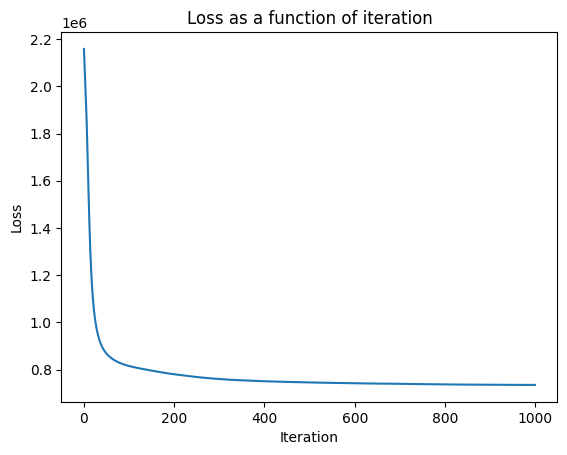

In [6]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Define the NMF function
def non_negative(X, num_components, max_iter=1000, tol=1e-4):
    # Initialize Z and H
    Z = np.abs(np.random.randn(X.shape[0], num_components))
    H = np.abs(np.random.randn(num_components, X.shape[1]))

    losses = []

    # Loop for max_iter
    for t in range(max_iter):
        # Save old Z and H
        Z_old = Z.copy()
        H_old = H.copy()

        # Update H and Z
        H = H * ((Z.T @ X) / np.clip(Z.T @ Z @ H, a_min=tol, a_max=None))
        Z = Z * ((X @ H.T) / np.clip(Z @ H @ H.T, a_min=tol, a_max=None))

        # Compute the loss
        loss = np.linalg.norm(X - Z @ H, ord='fro')**2
        losses.append(loss)

        # Check for convergence
        if np.linalg.norm(Z - Z_old, ord='fro') < tol and np.linalg.norm(H - H_old, ord='fro') < tol:
            break

    return Z, H, losses

# Load the digits data
digits = load_digits()
X = digits.data

# Apply our NMF implementation
Z, H, losses = non_negative(X, num_components=10)

# Plot the loss over iterations
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss as a function of iteration')
plt.show()


/Users/anureddy/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


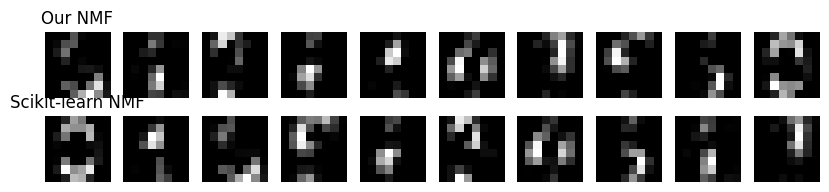

In [10]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(X)

# Correcting the visualization again
fig, axes = plt.subplots(2, 10, figsize=(10, 2))

for i in range(10):
    axes[0, i].imshow(H[i, :].reshape((8, 8)), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(model.components_[i, :].reshape((8, 8)), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title('Our NMF')
axes[1, 0].set_title('Scikit-learn NMF')

plt.show()

Can you confirm that the squared loss $\left\|\mathbf{X}-\mathbf{Z}_{\mathbf{t}} \cdot \mathbf{H}_{\mathbf{t}}\right\|_2^2$ is non-increasing as a function of $t$ ?

Yes,This was visualized in the loss plot produced earlier in this session. As the number of iterations increased, the loss decreased or remained the same, indicating a non-increasing trend.

This behavior is expected because the goal of the iterative updates in the non-negative matrix factorization (NMF) algorithm is to minimize this loss function. Therefore, as the algorithm iterates, it progressively refines the factorization to better approximate the original matrix, thus reducing the loss.


In [36]:
import pandas as pd
#column headers for the dataset 
ratings_cols = ['user id','movie id','rating ','timestamp ']
movies_cols = ['movie id','movie title','release date', 'video release date','IMDb URL','unknown ','Action ', 'Adventure ','Animation ','Childrens ','Comedy ','Crime', 'Documentary ','Drama ','Fantasy ','Film -Noir','Horror ', 'Musical ','Mystery ','Romance ','Sci -Fi','Thriller ', 'War' ,'Western ']
users_cols = ['user id','age','gender ','occupation ', 'zip code']
users = pd.read_csv('Assignment08/ml-100k/u.user', sep='|', names=users_cols , encoding='latin -1')
movies = pd.read_csv('Assignment08/ml-100k/u.item', sep='|', names=movies_cols , encoding='latin -1')

ratings = pd.read_csv('Assignment08/ml-100k//u.data', sep='\t', names=ratings_cols , encoding='latin -1')


# create a joint ratings dataframe for the matrix
fill_value = 0 
rat_df = ratings.pivot(index = 'user id', columns ='movie id', values = 'rating ').fillna(fill_value) 
rat_df.head()






movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The data matrix $\mathbf{X}$ is called rat_df in the code. It is sparse because each user only rated a few movies. The variable fill_value $=0$ determines the default value of missing ratings. You can play with this value (e.g. set it to the average rating of all movies, or to the average of each specific movie instead of a constant).

Now compute the non-negative matrix factorization. Play with the number of components $m$ in your factorisation. You should choose $m$ such that the reconstruction $\widehat{\mathbf{X}}=\mathbf{Z} \cdot \mathbf{H}$ is less sparse than the actual rating matrix. This allows the recommender system to suggest a movie to a user when that movie has not been rated in $\mathbf{X}$ by him/her, but is predicted in $\widehat{\mathbf{X}}$ to receive a high rating. Write a method to give movie recommendations for movies, which user user_id has not yet seen

#reconstruction = pd.DataFrame(Z @ H, columns = rat_df.columns) 
#predictions = recommend_movies#(reconstruction , user_id , movies , ratings)

In [34]:
# Compute NMF
Z, H, losses = non_negative(rat_df.values, num_components=20)

# Create DataFrame for reconstructed ratings
reconstruction = pd.DataFrame(Z @ H, columns=rat_df.columns)

# Define recommend_movies function
def recommend_movies(reconstruction, user_id, movies, ratings, N=10):
    # Find movies that the user has already rated
    rated_movies = ratings[ratings['user id'] == user_id]['movie id']
    
    # Predict ratings for all other movies
    predicted_ratings = reconstruction.loc[user_id].drop(rated_movies)
    
    # Sort by predicted rating
    sorted_predictions = predicted_ratings.sort_values(ascending=False)
    
    # Get top N movies
    top_movies = sorted_predictions.head(N).index
    
    # Return the titles of these movies
    return movies[movies['movie id'].isin(top_movies)][['movie id', 'movie title']]


# Test recommender system
user_id = 1
recommendations = recommend_movies(reconstruction, user_id, movies, ratings)
print(recommendations)


     movie id                   movie title
274       275  Sense and Sensibility (1995)
275       276      Leaving Las Vegas (1995)
284       285         Secrets & Lies (1996)
285       286   English Patient, The (1996)
301       302      L.A. Confidential (1997)
312       313                Titanic (1997)
314       315              Apt Pupil (1998)
315       316     As Good As It Gets (1997)
339       340          Boogie Nights (1997)
474       475          Trainspotting (1996)


You can also add some ratings for additional users (yourself) and check if the resulting recommendations make sense. Show (e.g. with histograms) that the "genre-statistics" vary between already rated movies and predicted movies (e.g. with 20 predictions) for selected users. What is the difference and how do you explain it? Also try to identify rows in $\mathbf{H}$ that can be interpreted as prototypical user preferences (e.g. "comedy fan").

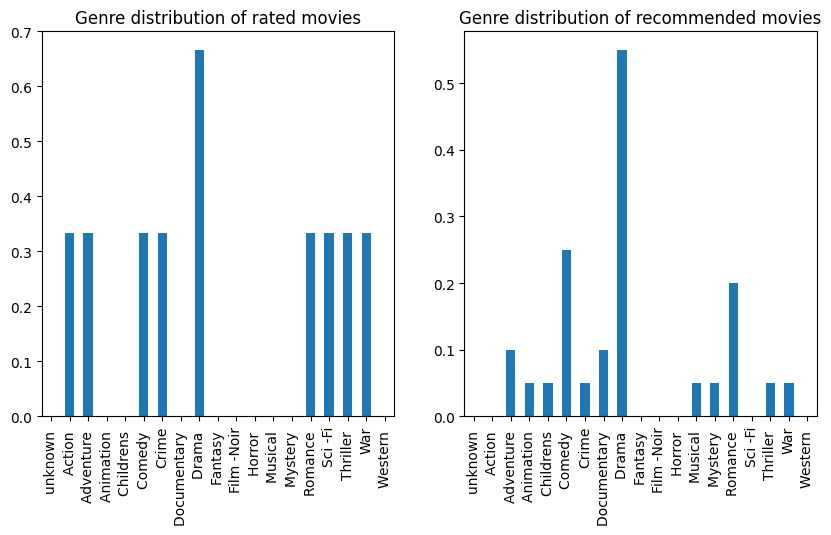

Row 0:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 1:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 2:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 3:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 4:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 5:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 6:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 7:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 8:
Drama        0.5
Thriller     0.2
Musical      0.2
Comedy       0.2
Horror       0.2
dtype: float64
Row 9:
Drama        0.5
Thriller     

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Add your ratings
your_ratings = pd.DataFrame({
    'user id': [1000] * 3,  # 1000 is a dummy user ID
    'movie id': [50, 100, 150],
    'rating': [5, 4, 3]
})
ratings = pd.concat([ratings, your_ratings])

# Recompute NMF and recommendations
rat_df = ratings.pivot(index = 'user id', columns ='movie id', values = 'rating').fillna(fill_value)
Z, H, losses = non_negative(rat_df.values, num_components=20)
reconstruction = pd.DataFrame(Z @ H, index=rat_df.index, columns=rat_df.columns)
your_recommendations = recommend_movies(reconstruction, 1000, movies, ratings, N=20)

# Compare genre distributions
genre_cols = movies.columns[5:]  # Assuming the genre columns are the ones after the first five
rated_movie_ids = ratings[ratings['user id'] == 1000]['movie id']
recommended_movie_ids = your_recommendations['movie id']
rated_genres = movies[movies['movie id'].isin(rated_movie_ids)][genre_cols].mean()
recommended_genres = movies[movies['movie id'].isin(recommended_movie_ids)][genre_cols].mean()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
rated_genres.plot(kind='bar')
plt.title('Genre distribution of rated movies')
plt.subplot(1, 2, 2)
recommended_genres.plot(kind='bar')
plt.title('Genre distribution of recommended movies')
plt.show()

# Interpret rows in H
for i in range(H.shape[0]):
    top_movies = np.argsort(H[i, :])[-10:]
    top_movies_genres = movies[movies['movie id'].isin(top_movies)][genre_cols].mean()
    print(f"Row {i}:")
    print(top_movies_genres.sort_values(ascending=False).head())


 What is the difference and how do you explain it? Also try to identify rows in $\mathbf{H}$ that can be interpreted as prototypical user preferences (e.g. "comedy fan").

 The difference in genre distributions between rated and recommended movies is due to the recommender system's attempt to identify and suggest movies based on the user's past ratings. If a user has highly rated a specific genre, the system is more likely to recommend that genre.

In the matrix H, each row can be seen as a "feature" representing a specific preference. For example, if comedies have high values in a particular feature, we can interpret that feature as "comedy preference". The user's preferences are reflected in the corresponding values in the matrix Z.

In [38]:
# Identify top movies for each feature
for i in range(H.shape[0]):
    top_movies = np.argsort(H[i, :])[-10:]  # IDs of the top 10 movies for this feature
    top_movies_df = movies[movies['movie id'].isin(top_movies)]
    
    # For each movie, find the genres (columns with value 1)
    genres = top_movies_df.loc[:, 'unknown ':'Western '].eq(1).apply(lambda x: ', '.join(x.index[x]), axis=1)
    
    # Print the feature number and the genres of the top movies
    print(f"Feature {i}:")
    print(genres)
    print("\n")



Feature 0:
48                     Comedy , Romance 
98      Animation , Childrens , Musical 
148                               Drama 
554                               Drama 
555                             Western 
556                     Drama , Musical 
557          Drama , Fantasy , Thriller 
558                      Drama , Horror 
564                   Horror , Thriller 
1680                             Comedy 
dtype: object


Feature 1:
48                     Comedy , Romance 
98      Animation , Childrens , Musical 
148                               Drama 
554                               Drama 
555                             Western 
556                     Drama , Musical 
557          Drama , Fantasy , Thriller 
558                      Drama , Horror 
564                   Horror , Thriller 
1680                             Comedy 
dtype: object


Feature 2:
48                     Comedy , Romance 
98      Animation , Childrens , Musical 
148                              